In [1]:
from PPM_lib import *

In [2]:
fs = 10000 # Hz
nbits = 20 # bits
f_laser = 50 # Hz
p_tx = 2 # potencia media del laser en W

### Transmisor

In [3]:
seq_ook = np.random.randint(0,2,nbits)

y_base = np.kron(seq_ook, np.ones(fs//nbits)) # señal eléctica en banda base

t = np.linspace(0,1,fs) # tiempo
p = (2 * p_tx)**0.5 * np.cos(2*pi*f_laser*t) # portadora óptica

y_tx = y_base*p_tx**0.5 # señal óptica pasa banda

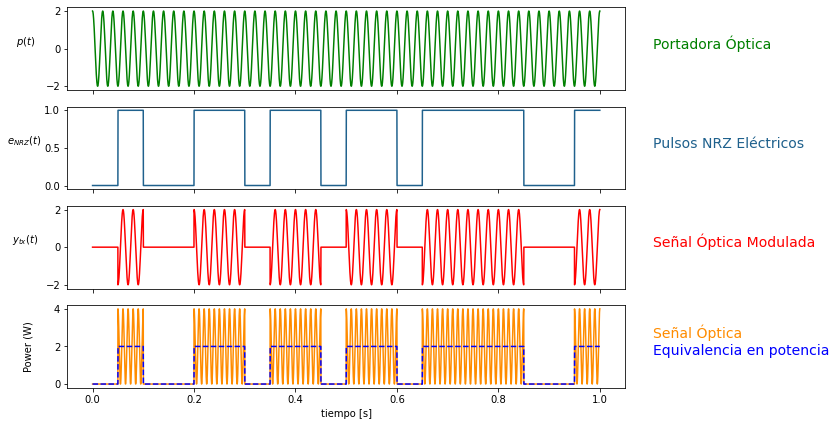

P_out_mod: 1.2 W


In [4]:
fig,(ax1,ax2,ax3,ax4) = subplots(4,1,sharex=True,figsize=(10,7))
ax1.plot(t,p,'g')
ax1.set_ylabel(r'$p(t)$',rotation=0,labelpad=20)
ax1.text(1.05,0.5,'Portadora Óptica', fontsize = 14,color='g',transform=ax1.transAxes)

ax2.plot(t,y_base, '#1F618D')
ax2.set_ylabel(r'$e_{NRZ}(t)$',rotation=0,labelpad=20)
ax2.text(1.05,0.5,'Pulsos NRZ Eléctricos', color = '#1F618D', fontsize = 14,transform=ax2.transAxes)

ax3.plot(t,y_base*p,'r')
ax3.set_ylabel(r'$y_{tx}(t)$',rotation=0,labelpad=20)
ax3.text(1.05,0.5,'Señal Óptica Modulada', color='r', fontsize = 14,transform=ax3.transAxes)

ax4.plot(t,np.abs(y_base*p)**2,'darkorange')
ax4.set_ylabel(r'Power (W)',rotation=90,labelpad=20)
ax4.plot(t,y_tx**2,'b--')
ax4.text(1.05,0.6,'Señal Óptica', color='darkorange', fontsize = 14,transform=ax4.transAxes)
ax4.text(1.05,0.4,'Equivalencia en potencia', color='b', fontsize = 14,transform=ax4.transAxes)
ax4.set_xlabel('tiempo [s]')
# savefig('Cp2-modulador.png',dpi=300,bbox_inches='tight')
show()
print('P_out_mod: %.1f W'%power(y_tx,'w'))

### Canal

In [5]:
y_rx = np.sqrt(0.5) * y_tx 

P_rx: 0.6 W


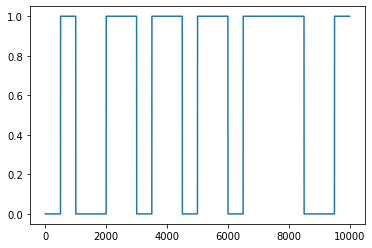

In [6]:
print('P_rx: %.1f W'%power(y_rx,'w'))
plot(y_rx)
show()

### Receptor

In [7]:
y_PD = np.abs(y_rx)**2

sos_low = sg.bessel(N = 4, Wn = nbits, btype = 'low', fs=fs, output='sos', norm='mag')
y_filt = sg.sosfiltfilt(sos_low, y_PD)

P_PD: 0.600 W
P_filt: 0.543 W


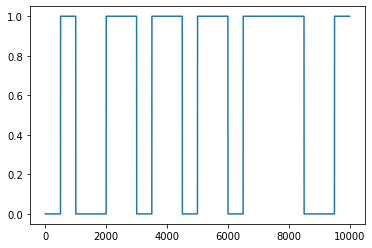

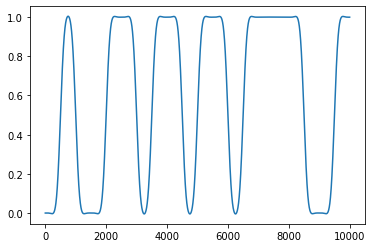

In [8]:
print('P_PD: %.3f W'%power(y_PD,'w'))
print('P_filt: %.3f W'%power(y_filt,'w'))
plot(y_PD)
figure()
plot(y_filt)
show()